In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df['bmi'].mean()

28.893236911794673

In [6]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean(),axis=0)

In [7]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='gender'>

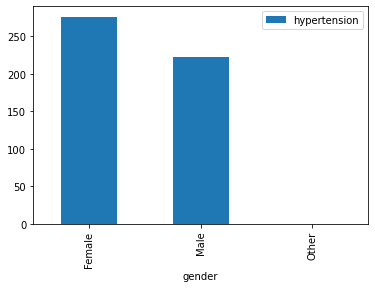

In [10]:
gen = df[['gender','hypertension']]
gen.groupby(['gender'],axis=0).sum().plot.bar()

<AxesSubplot:xlabel='gender'>

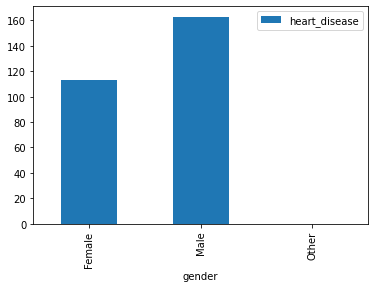

In [11]:
hd = df[['gender','heart_disease']]
hd.groupby(['gender'],axis=0).sum().plot.bar()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

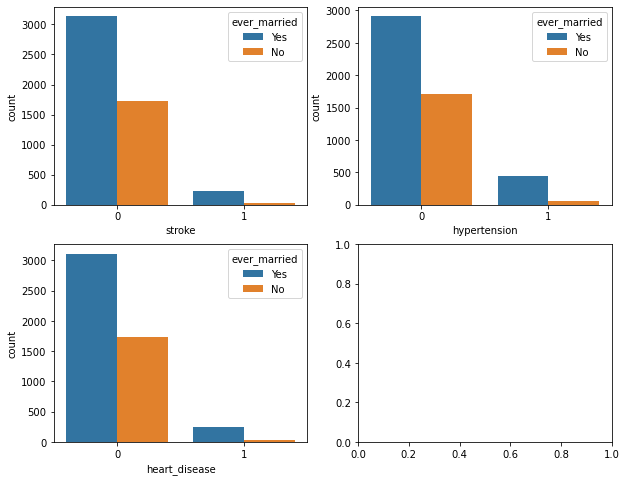

In [12]:
fig, ax = plt.subplots(2,2, figsize=(10,8))
sns.countplot(df['stroke'],hue=df['ever_married'],ax=ax[0,0])
sns.countplot(df['hypertension'],hue=df['ever_married'],ax=ax[0,1])
sns.countplot(df['heart_disease'],hue=df['ever_married'],ax=ax[1,0])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

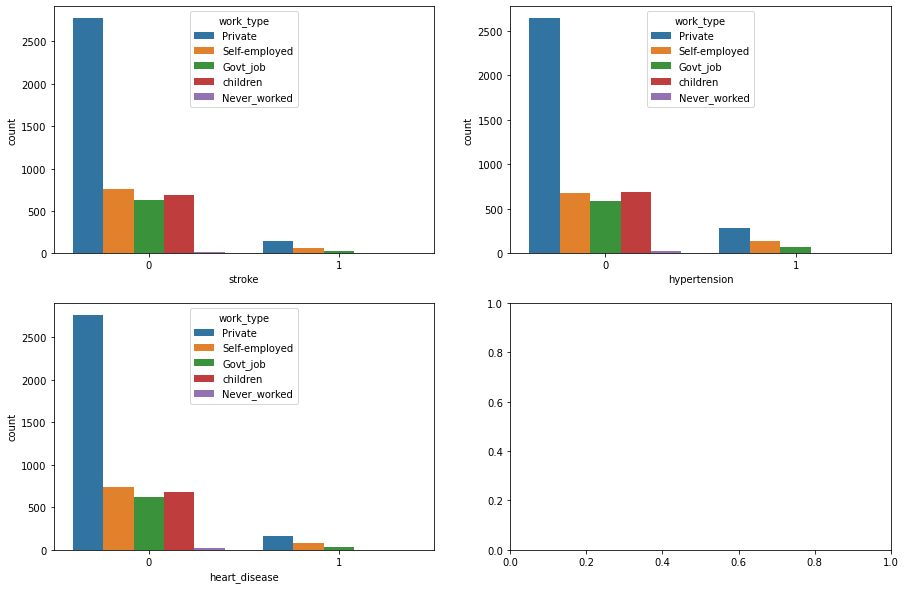

In [13]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(df['stroke'],hue=df['work_type'],ax=ax[0,0])
sns.countplot(df['hypertension'],hue=df['work_type'],ax=ax[0,1])
sns.countplot(df['heart_disease'],hue=df['work_type'],ax=ax[1,0])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

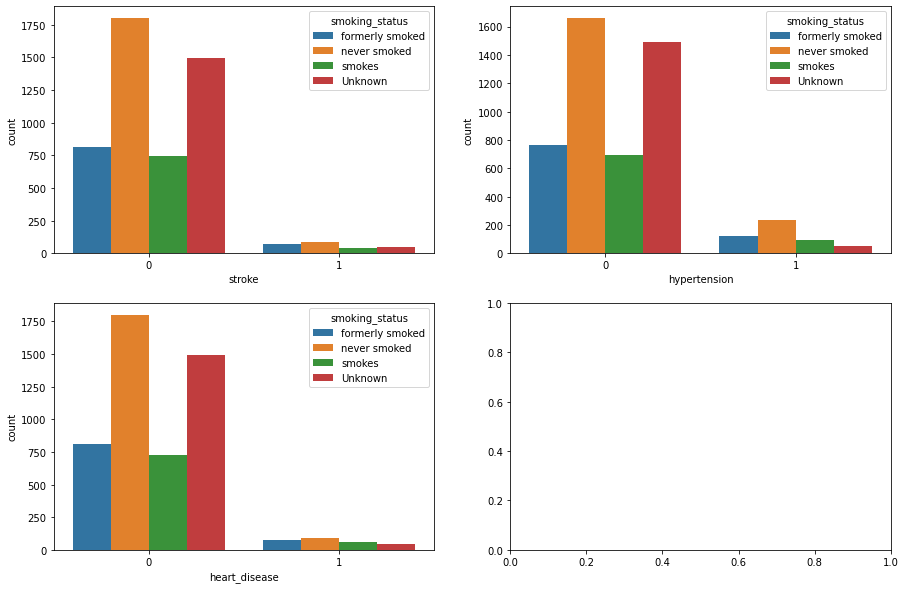

In [14]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(df['stroke'],hue=df['smoking_status'],ax=ax[0,0])
sns.countplot(df['hypertension'],hue=df['smoking_status'],ax=ax[0,1])
sns.countplot(df['heart_disease'],hue=df['smoking_status'],ax=ax[1,0])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

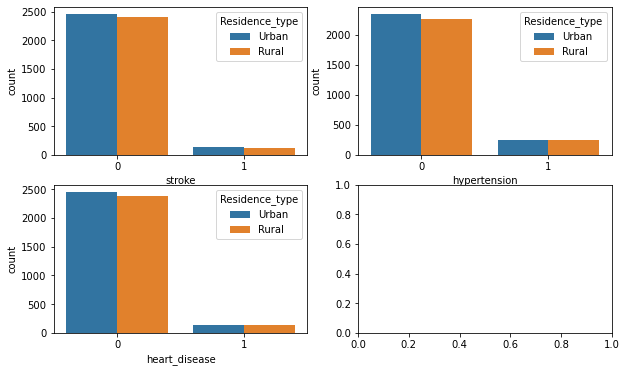

In [15]:
fig, ax = plt.subplots(2,2, figsize=(10,6))
sns.countplot(df['stroke'],hue=df['Residence_type'],ax=ax[0,0])
sns.countplot(df['hypertension'],hue=df['Residence_type'],ax=ax[0,1])
sns.countplot(df['heart_disease'],hue=df['Residence_type'],ax=ax[1,0])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

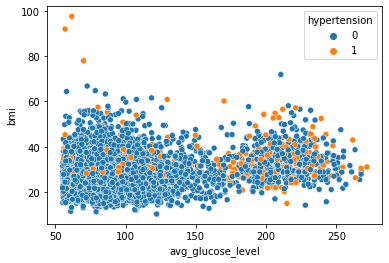

In [16]:
sns.scatterplot(y=df['bmi'],x=df['avg_glucose_level'],hue=df['hypertension'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

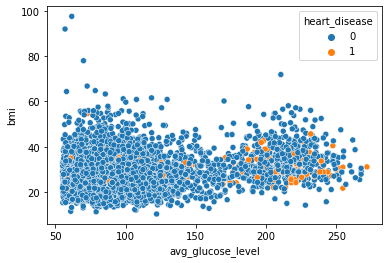

In [17]:
sns.scatterplot(y=df['bmi'],x=df['avg_glucose_level'],hue=df['heart_disease'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

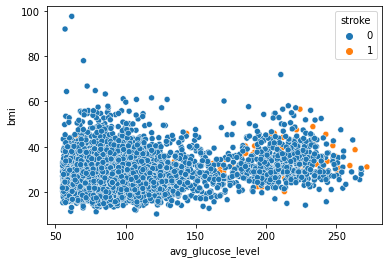

In [18]:
sns.scatterplot(y=df['bmi'],x=df['avg_glucose_level'],hue=df['stroke'])

In [19]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='smoking_status', ylabel='age'>

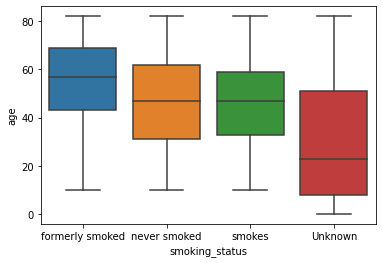

In [20]:
sns.boxplot(df['smoking_status'],df['age'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='work_type', ylabel='age'>

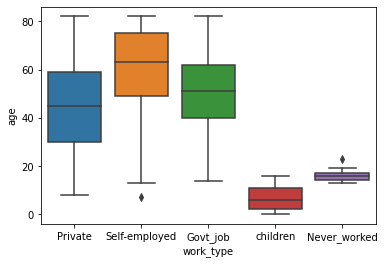

In [21]:
sns.boxplot(df['work_type'],df['age'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ever_married', ylabel='age'>

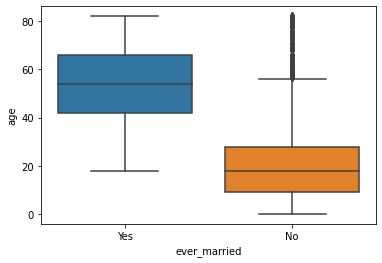

In [22]:
sns.boxplot(df['ever_married'],df['age'])

In [23]:
df['gender'] = df['gender'].map({'Female':1,'Male':0})
df['ever_married'] = df['ever_married'].map({'Yes':1,'No':0})
df['Residence_type'] = df['Residence_type'].map({'Urban':1,'Rural':0})

In [24]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [25]:
df['work_type'] = df['work_type'].map({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})

In [26]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,1,0,1,228.69,36.600000,formerly smoked,1
1,51676,1.0,61.0,0,0,1,1,0,202.21,28.893237,never smoked,1
2,31112,0.0,80.0,0,1,1,0,0,105.92,32.500000,never smoked,1
3,60182,1.0,49.0,0,0,1,0,1,171.23,34.400000,smokes,1
4,1665,1.0,79.0,1,0,1,1,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,1,0,1,83.75,28.893237,never smoked,0
5106,44873,1.0,81.0,0,0,1,1,1,125.20,40.000000,never smoked,0
5107,19723,1.0,35.0,0,0,1,1,0,82.99,30.600000,never smoked,0
5108,37544,0.0,51.0,0,0,1,0,0,166.29,25.600000,formerly smoked,0


In [27]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [28]:
df['smoking_status'] = df['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':3})

In [29]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,1,0,1,228.69,36.600000,2,1
1,51676,1.0,61.0,0,0,1,1,0,202.21,28.893237,0,1
2,31112,0.0,80.0,0,1,1,0,0,105.92,32.500000,0,1
3,60182,1.0,49.0,0,0,1,0,1,171.23,34.400000,3,1
4,1665,1.0,79.0,1,0,1,1,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,1,0,1,83.75,28.893237,0,0
5106,44873,1.0,81.0,0,0,1,1,1,125.20,40.000000,0,0
5107,19723,1.0,35.0,0,0,1,1,0,82.99,30.600000,0,0
5108,37544,0.0,51.0,0,0,1,0,0,166.29,25.600000,2,0


In [30]:
df['gender'] = df['gender'].fillna(df['gender'].mean())

In [31]:
df['gender'] = df['gender'].astype(int)
df['age'] = df['age'].astype(int)
df['avg_glucose_level'] = df['avg_glucose_level'].astype(int)
df['bmi'] = df['bmi'].astype(int)

In [32]:
y = df['stroke']
X=df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status']]

In [33]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [34]:
df['gender'][df['gender'].isnull()]

Series([], Name: gender, dtype: int64)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

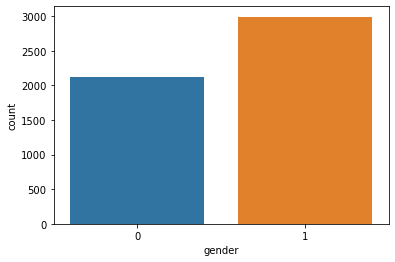

In [35]:
sns.countplot(df['gender'])

In [36]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67,0,1,1,0,1,228,36,2,1
1,51676,1,61,0,0,1,1,0,202,28,0,1
2,31112,0,80,0,1,1,0,0,105,32,0,1
3,60182,1,49,0,0,1,0,1,171,34,3,1
4,1665,1,79,1,0,1,1,0,174,24,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80,1,0,1,0,1,83,28,0,0
5106,44873,1,81,0,0,1,1,1,125,40,0,0
5107,19723,1,35,0,0,1,1,0,82,30,0,0
5108,37544,0,51,0,0,1,0,0,166,25,2,0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
reg = LinearRegression()

In [41]:
reg = reg.fit(X_train,y_train)

In [42]:
prediction = reg.predict(X_test)
prediction

array([ 0.02417933, -0.0014179 , -0.01246453, ...,  0.01055215,
       -0.00231148, -0.01941683])

In [43]:
reg.score(X_train,y_train)

0.07422387730218116

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier()

In [46]:
rf = rf.fit(X_train,y_train)

In [47]:
predict = rf.predict(X_test)

In [48]:
rf.score(X_train,y_train)

1.0

In [49]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67,0,1,1,0,1,228,36,2,1
1,51676,1,61,0,0,1,1,0,202,28,0,1
2,31112,0,80,0,1,1,0,0,105,32,0,1
3,60182,1,49,0,0,1,0,1,171,34,3,1
4,1665,1,79,1,0,1,1,0,174,24,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80,1,0,1,0,1,83,28,0,0
5106,44873,1,81,0,0,1,1,1,125,40,0,0
5107,19723,1,35,0,0,1,1,0,82,30,0,0
5108,37544,0,51,0,0,1,0,0,166,25,2,0


In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt = dt.fit(X_train,y_train)

In [53]:
dt_predict = dt.predict(X_test)

In [54]:
dt.score(X_train,y_train)

1.0

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test,dt_predict))
print(confusion_matrix(y_test,dt_predict))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1591
           1       0.16      0.18      0.17        96

    accuracy                           0.90      1687
   macro avg       0.56      0.56      0.56      1687
weighted avg       0.91      0.90      0.90      1687

[[1503   88]
 [  79   17]]


In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()

In [59]:
lr = lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
lr_predict = lr.predict(X_test)

In [61]:
lr.score(X_train,y_train)

0.955594507741747

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
print(classification_report(y_test,lr_predict))
print(confusion_matrix(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687

[[1591    0]
 [  96    0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
kn = KNeighborsClassifier()

In [66]:
kn = kn.fit(X_train,y_train)

In [67]:
kn_predict = kn.predict(X_test)

In [68]:
kn.score(X_train,y_train)

0.9582237803096699

In [69]:
print(classification_report(y_test,kn_predict))
print(confusion_matrix(y_test,kn_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1591
           1       0.09      0.01      0.02        96

    accuracy                           0.94      1687
   macro avg       0.52      0.50      0.49      1687
weighted avg       0.89      0.94      0.91      1687

[[1581   10]
 [  95    1]]


In [70]:
from sklearn.svm import LinearSVC

In [71]:
svc = LinearSVC()

In [72]:
svc = svc.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [73]:
svc_predict = svc.predict(X_test)

In [74]:
svc.score(X_train,y_train)

0.9553023663453112

In [75]:
print(classification_report(y_test,svc_predict))
print(confusion_matrix(y_test,svc_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687

[[1591    0]
 [  96    0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
